## Part 1: Preparing data

In [1]:
# Import libraries

import numpy as np
import pandas as pd
from scipy import stats # Random number tuning
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# Read in Kickstarter data

kickstarter = pd.read_csv(r'../kickstarter.csv', index_col=0)

In [3]:
# Selecting model features and response

kickstarter_features = kickstarter[['goal_USD', 'month', 'day', 'year', 'days_to_deadline', 'category_name', 'category_slug', 'location_country']]
kickstarter_response = kickstarter.binary_state

In [4]:
# Changing month, day, and year to categorical data

kickstarter_features.loc[:, 'month'] = kickstarter['month'].astype('category').values
kickstarter_features.loc[:, 'day'] = kickstarter['day'].astype('category').values 
kickstarter_features.loc[:, 'year'] = kickstarter['year'].astype('category').values

C:\Users\Tom\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
# Encoding category columns

kickstarter_features = pd.get_dummies(kickstarter_features, columns=['category_name', 'category_slug', 'location_country'])

In [6]:
# Binarizing labels into yes/no for successful/failed

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(kickstarter_response).ravel()

In [7]:
# Scaling features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(kickstarter_features)

In [8]:
# Minmax scaler for Naive Bayes

def minmaxscaling(X):
    ''' Performs minmaxscaling for Naive Bayes. Returns transformed matrix. '''
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(kickstarter_features)
    return (X)

In [9]:
# Splitting data into training and testing. In function to call before naive bayes.

def train_test_split(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
# Function to score different machine learning models.

def score_model(clf, X_input_data, y_true):
    '''
    Scores a machine learning model, provides summary statistics, plots ROC curve.
   
    Inputs: classifier, X_input_data (X_train or X_test), y_true (y_train or y_test)
    ''' 
    
    # Scoring models. Test model. Change to allow prediction for X_train
    y_pred = clf.predict(X_input_data)

    # Fit an accuracy score
    from sklearn.metrics import accuracy_score
    print('\n Accuracy Score: \n \n', "{:.2%}".format(accuracy_score(y_true, y_pred, normalize=True)))

    # Create confusion matrix
    from sklearn.metrics import confusion_matrix
    print('\n Confusion Matrix: \n \n', confusion_matrix(y_true, y_pred))

    # Print classification report
    from sklearn.metrics import classification_report
    print('\n Classification Report: \n \n', classification_report(y_true, y_pred))

    # Generate ROC plot
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt

    # Compute predicted probabilities: y_pred_prob. Try except for SGD: hinge loss model.
    try:
        y_pred_prob = clf.predict_proba(X_input_data)[:,1]
        
        # Generate ROC curve values: fpr, tpr, thresholds
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

        # Plot ROC curve
        f, ax = plt.subplots(figsize=(8, 8))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()
    
    except AttributeError:
        print('Probability estimates not available \n')
        

## Part 2: Scoring machine learning models without hyperparameter tuning.

### A.) Logistic Regression

Training: 

 Accuracy Score: 
 
 72.32%

 Confusion Matrix: 
 
 [[143766  28705]
 [ 51201  65056]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78    172471
           1       0.69      0.56      0.62    116257

    accuracy                           0.72    288728
   macro avg       0.72      0.70      0.70    288728
weighted avg       0.72      0.72      0.72    288728



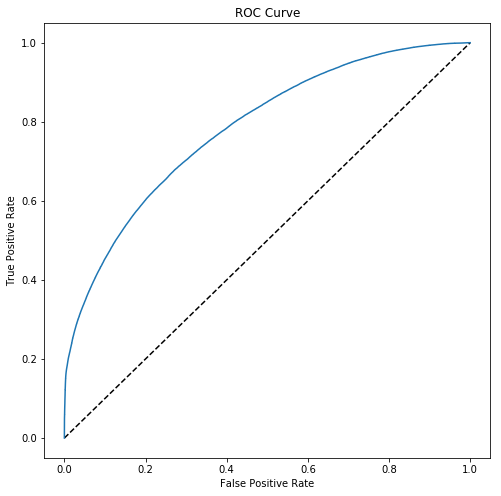

Testing: 

 Accuracy Score: 
 
 72.29%

 Confusion Matrix: 
 
 [[70580 14166]
 [25236 32228]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     84746
           1       0.69      0.56      0.62     57464

    accuracy                           0.72    142210
   macro avg       0.72      0.70      0.70    142210
weighted avg       0.72      0.72      0.72    142210



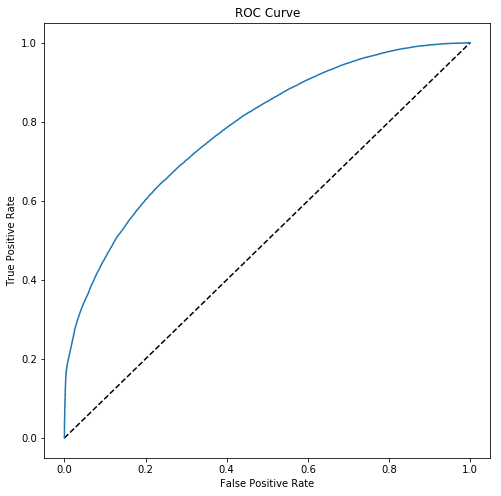

In [11]:
# Working logistic regression out of the box with no hyperparameters.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
fitted = logreg.fit(X_train, y_train)
print('Training: ')
score_model(fitted, X_train, y_train)
print('Testing: ')
score_model(fitted, X_test, y_test)

### B.) Naive Bayes

Training: 

 Accuracy Score: 
 
 70.31%

 Confusion Matrix: 
 
 [[137484  34987]
 [ 50750  65507]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76    172471
           1       0.65      0.56      0.60    116257

    accuracy                           0.70    288728
   macro avg       0.69      0.68      0.68    288728
weighted avg       0.70      0.70      0.70    288728



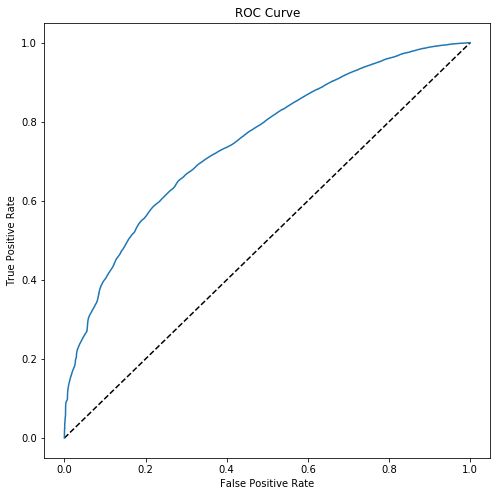

Testing: 

 Accuracy Score: 
 
 70.72%

 Confusion Matrix: 
 
 [[67741 17005]
 [24634 32830]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.73      0.80      0.76     84746
           1       0.66      0.57      0.61     57464

    accuracy                           0.71    142210
   macro avg       0.70      0.69      0.69    142210
weighted avg       0.70      0.71      0.70    142210



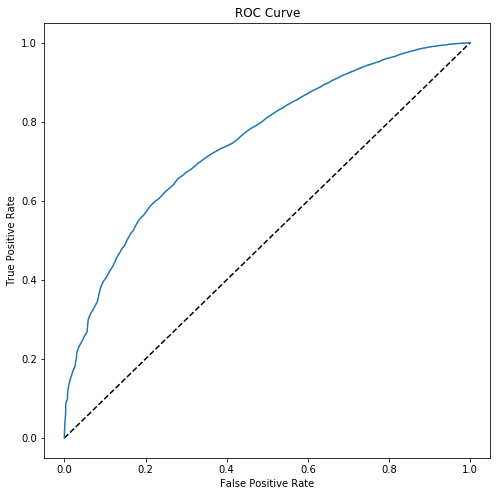

In [21]:
# For Naive Bayes, make sure to run with MinMaxScaler first

from sklearn.naive_bayes import MultinomialNB
X_minmax = minmaxscaling(X)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_minmax, y)
nb = MultinomialNB()
fitted = nb.fit(X_train_mm, y_train_mm.ravel())
print('Training: ')
score_model(fitted, X_train_mm, y_train_mm)
print('Testing: ')
score_model(fitted, X_test_mm, y_test_mm)

### C.) Random Forest

Training: 

 Accuracy Score: 
 
 94.61%

 Confusion Matrix: 
 
 [[166486   5985]
 [  9572 106685]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    172471
           1       0.95      0.92      0.93    116257

    accuracy                           0.95    288728
   macro avg       0.95      0.94      0.94    288728
weighted avg       0.95      0.95      0.95    288728



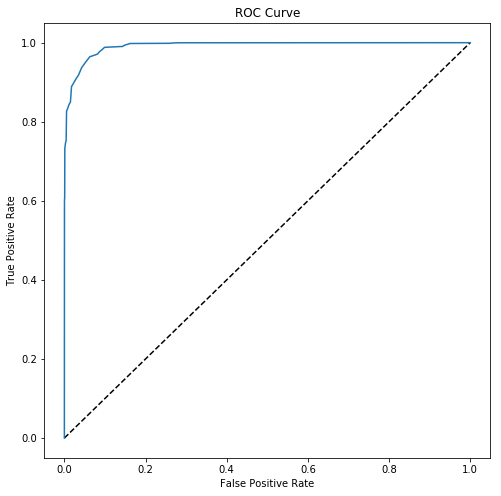

Testing: 

 Accuracy Score: 
 
 74.65%

 Confusion Matrix: 
 
 [[70244 14502]
 [21547 35917]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80     84746
           1       0.71      0.63      0.67     57464

    accuracy                           0.75    142210
   macro avg       0.74      0.73      0.73    142210
weighted avg       0.74      0.75      0.74    142210



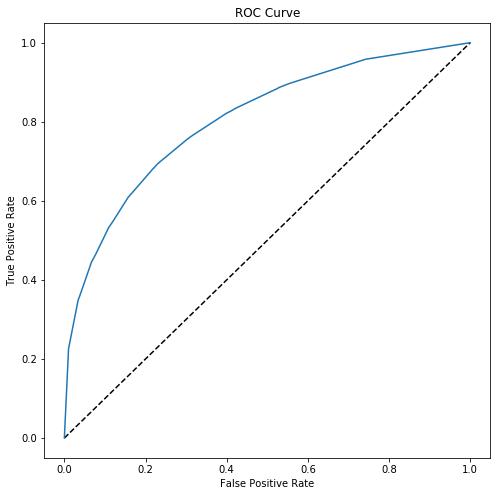

In [33]:
# Fitting random forest model, getting model coefficients

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
fitted = rf.fit(X_train, y_train)
print('Training: ')
score_model(fitted, X_train, y_train)
print('Testing: ')
score_model(rf, X_test, y_test)

### D.) Stochastic Gradient Descent

In [34]:
# Fitting support vector classifier.  Using a linear model because fit time scales quadratically with normal SVC.

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
print('Training: ')
fitted = sgd.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
print('Testing: ')
score_model(fitted, X_test, y_test)

Training: 

 Accuracy Score: 
 
 70.68%

 Confusion Matrix: 
 
 [[139284  33187]
 [ 51467  64790]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77    172471
           1       0.66      0.56      0.60    116257

    accuracy                           0.71    288728
   macro avg       0.70      0.68      0.69    288728
weighted avg       0.70      0.71      0.70    288728

Probability estimates not available 

Testing: 

 Accuracy Score: 
 
 70.85%

 Confusion Matrix: 
 
 [[68412 16334]
 [25114 32350]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     84746
           1       0.66      0.56      0.61     57464

    accuracy                           0.71    142210
   macro avg       0.70      0.69      0.69    142210
weighted avg       0.70      0.71      0.70    142210

Probability estimates not available 



### E.) XGBoost


 Accuracy Score: 
 
 67.02%

 Confusion Matrix: 
 
 [[156518  15953]
 [ 79265  36992]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.66      0.91      0.77    172471
           1       0.70      0.32      0.44    116257

    accuracy                           0.67    288728
   macro avg       0.68      0.61      0.60    288728
weighted avg       0.68      0.67      0.63    288728



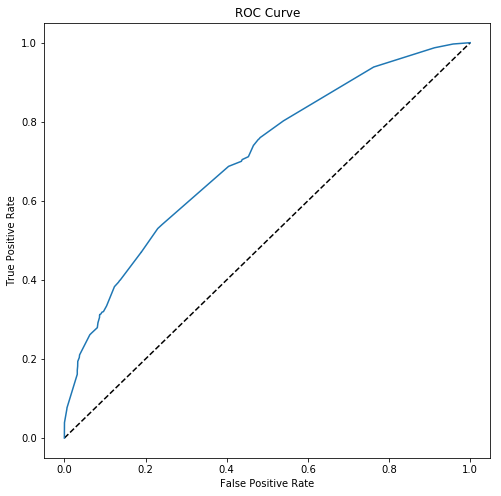


 Accuracy Score: 
 
 67.15%

 Confusion Matrix: 
 
 [[76954  7792]
 [38922 18542]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.66      0.91      0.77     84746
           1       0.70      0.32      0.44     57464

    accuracy                           0.67    142210
   macro avg       0.68      0.62      0.60    142210
weighted avg       0.68      0.67      0.64    142210



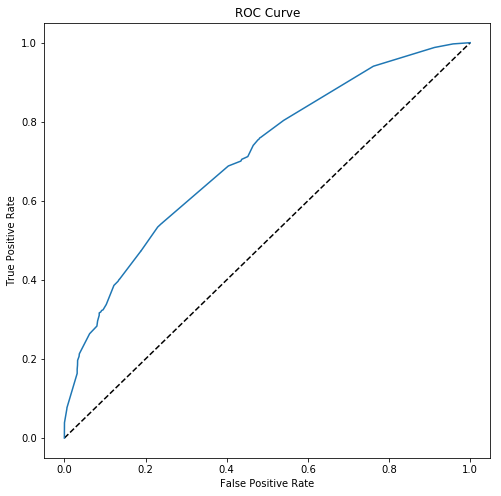

AttributeError: 'XGBRFClassifier' object has no attribute 'XGBRFClassifier'

In [35]:
import xgboost as xgb

# find best parameters using grid search
X_train, X_test, y_train, y_test = train_test_split(X, y)
params = {
    "objective": ['binary:logistic'],
    "eval_metric": ['auc']}
xgb = xgb.XGBRFClassifier(n_estimators=10, parameters=params)
fitted = xgb.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)

xgb.XGBRFClassifier()

## Part 3: Tuning Hyperparameters 

### A.) Logistic Regression

In [38]:
# Parameters we want to tune: C
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

parameter_list = {'C': stats.uniform(0, 10000)}
logreg = LogisticRegression(solver='lbfgs')
rand_search = RandomizedSearchCV(logreg,
                                 param_distributions=parameter_list,
                                 n_iter=10,
                                 n_jobs=-1,
                                 cv=10,
                                 random_state=42,
                                 scoring='roc_auc')

fitted = rand_search.fit(X_train, y_train)


 Accuracy Score: 
 
 72.33%

 Confusion Matrix: 
 
 [[143730  28741]
 [ 51147  65110]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78    172471
           1       0.69      0.56      0.62    116257

    accuracy                           0.72    288728
   macro avg       0.72      0.70      0.70    288728
weighted avg       0.72      0.72      0.72    288728



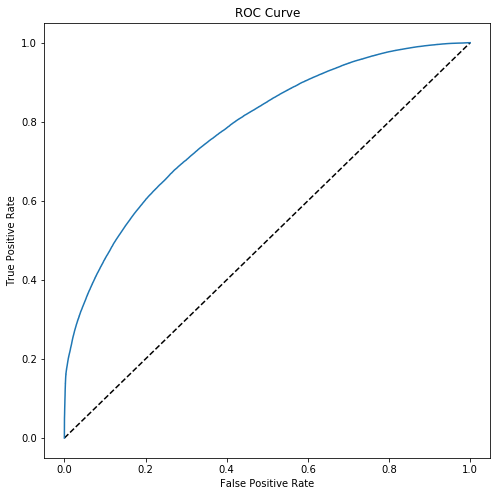


 Accuracy Score: 
 
 72.31%

 Confusion Matrix: 
 
 [[70562 14184]
 [25200 32264]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.83      0.78     84746
           1       0.69      0.56      0.62     57464

    accuracy                           0.72    142210
   macro avg       0.72      0.70      0.70    142210
weighted avg       0.72      0.72      0.72    142210



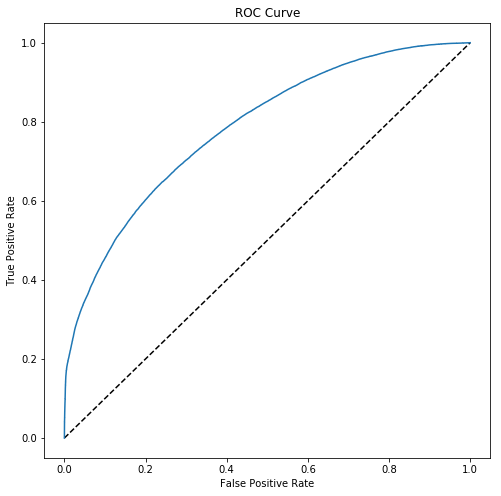

In [39]:
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)

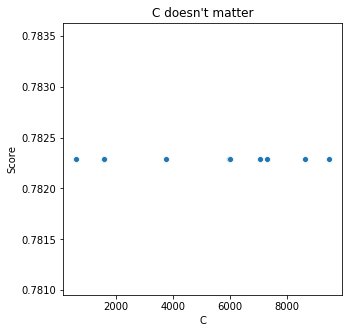

In [40]:
df = pd.DataFrame(rand_search.cv_results_['mean_test_score'],
                  rand_search.cv_results_['param_C'],
                  ).reset_index()
df.columns = ['C', 'Score']
f, ax = plt.subplots(figsize=(5, 5))
ax.set_title("C doesn't matter")
sns.scatterplot(x=df.C, y=df.Score)
plt.show()

### B.) Naive Bayes

In [41]:
# No hyperparameter tuning needed!

### C.) Random Forest


 Accuracy Score: 
 
 68.16%

 Confusion Matrix: 
 
 [[149661  22810]
 [ 69126  47131]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.68      0.87      0.77    172471
           1       0.67      0.41      0.51    116257

    accuracy                           0.68    288728
   macro avg       0.68      0.64      0.64    288728
weighted avg       0.68      0.68      0.66    288728



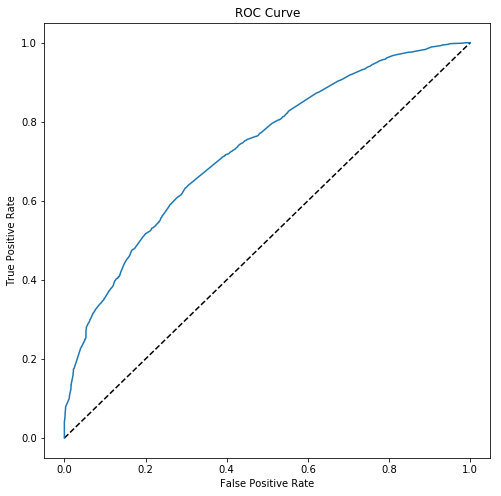


 Accuracy Score: 
 
 68.20%

 Confusion Matrix: 
 
 [[73525 11221]
 [34004 23460]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.68      0.87      0.76     84746
           1       0.68      0.41      0.51     57464

    accuracy                           0.68    142210
   macro avg       0.68      0.64      0.64    142210
weighted avg       0.68      0.68      0.66    142210



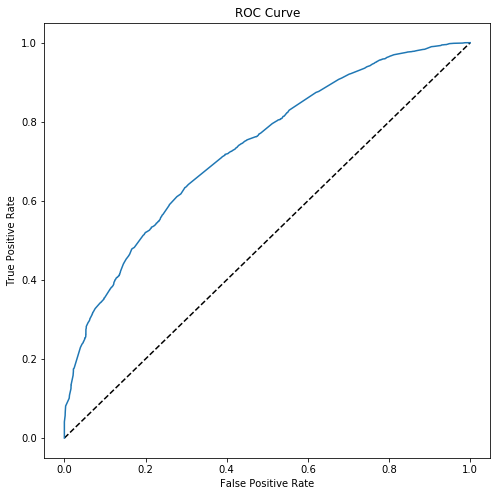

{'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_leaf_nodes': 9, 'max_features': 0.4, 'max_depth': 8}


In [42]:
parameters = {
    'n_estimators': [x for x in range(30, 80, 10)],
    'max_depth': [x for x in range(2, 9)],
    'min_samples_split': [x for x in range(2, 10)],
    'min_samples_leaf': [x for x in range(1, 7)],
    'max_leaf_nodes': [x for x in range(3, 10)],
    'max_features': [x/10 for x in range(1, 10)]
}

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=25, n_jobs=-1, cv=3)
fitted = rand_search.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)
print(rand_search.best_params_)


 Accuracy Score: 
 
 95.69%

 Confusion Matrix: 
 
 [[167437   5034]
 [  7423 108834]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    172471
           1       0.96      0.94      0.95    116257

    accuracy                           0.96    288728
   macro avg       0.96      0.95      0.96    288728
weighted avg       0.96      0.96      0.96    288728



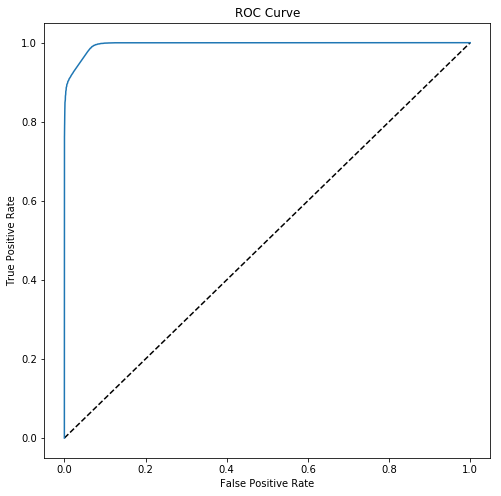


 Accuracy Score: 
 
 75.48%

 Confusion Matrix: 
 
 [[69839 14907]
 [19957 37507]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80     84746
           1       0.72      0.65      0.68     57464

    accuracy                           0.75    142210
   macro avg       0.75      0.74      0.74    142210
weighted avg       0.75      0.75      0.75    142210



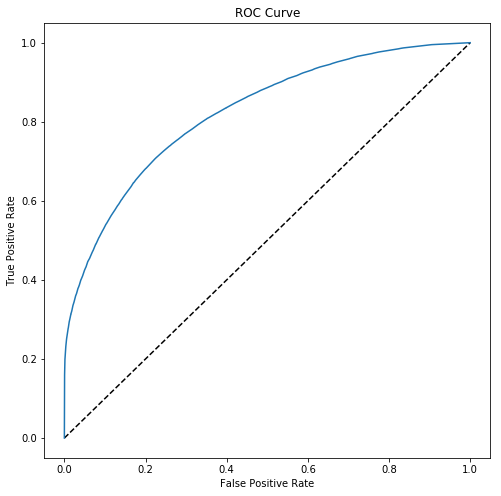

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, 
                            min_samples_leaf=1,  
                            max_features=.2,
                            n_jobs=-1)
fitted = rf.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)

In [44]:
results = pd.DataFrame(list(kickstarter_features), rf.feature_importances_).reset_index()
results.columns = ['Importance', 'Feature']
top10features = results.sort_values(by='Importance', ascending=False).head(10)

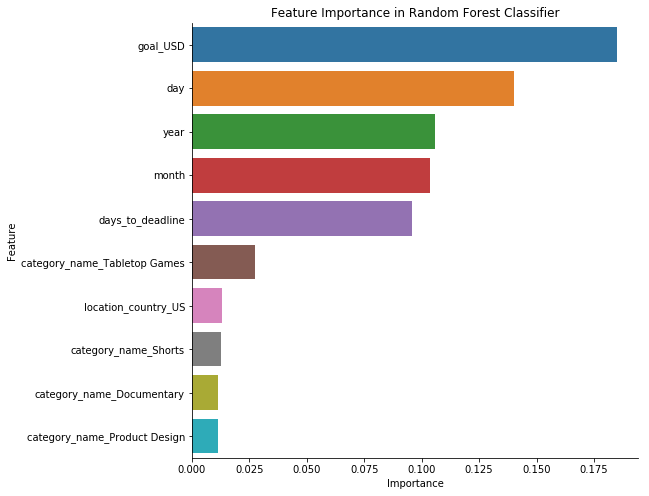

In [45]:
# https://stats.stackexchange.com/questions/314567/feature-importance-with-dummy-variables
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=top10features.Importance, y=top10features.Feature)
ax.set_title("Feature Importance in Random Forest Classifier")
sns.despine()
plt.show()

### D.) Stochastic Gradient Descent


 Accuracy Score: 
 
 72.32%

 Confusion Matrix: 
 
 [[144529  27942]
 [ 51982  64275]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.84      0.78    172471
           1       0.70      0.55      0.62    116257

    accuracy                           0.72    288728
   macro avg       0.72      0.70      0.70    288728
weighted avg       0.72      0.72      0.72    288728



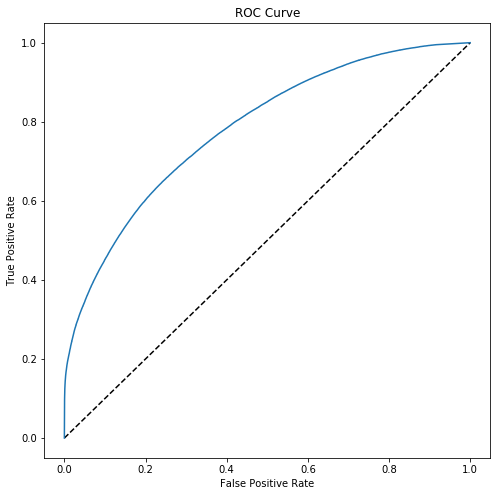


 Accuracy Score: 
 
 72.36%

 Confusion Matrix: 
 
 [[70984 13762]
 [25543 31921]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.74      0.84      0.78     84746
           1       0.70      0.56      0.62     57464

    accuracy                           0.72    142210
   macro avg       0.72      0.70      0.70    142210
weighted avg       0.72      0.72      0.72    142210



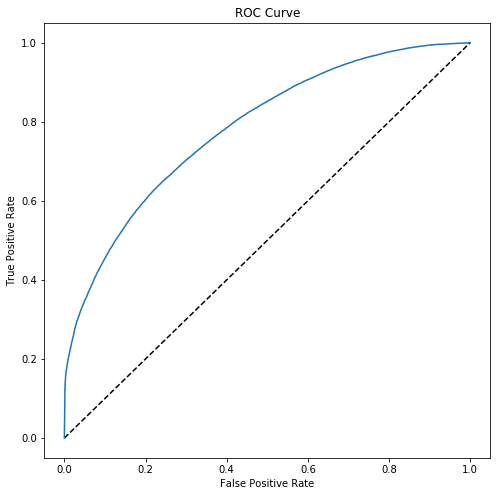

{'penalty': 'l2', 'loss': 'modified_huber', 'learning_rate': 'adaptive', 'eta0': 6}


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
parameters = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty': ['None', 'l1', 'l2', 'elasticnet'],
             'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
             'eta0': [x for x in range(1, 11)]}

rand_search = RandomizedSearchCV(sgd, param_distributions=parameters, n_iter=25, n_jobs=-1, cv=5, scoring='roc_auc')
fitted = rand_search.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)
print(rand_search.best_params_)

### E.) XGBoost


 Accuracy Score: 
 
 70.40%

 Confusion Matrix: 
 
 [[166523   5948]
 [ 79508  36749]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.68      0.97      0.80    172471
           1       0.86      0.32      0.46    116257

    accuracy                           0.70    288728
   macro avg       0.77      0.64      0.63    288728
weighted avg       0.75      0.70      0.66    288728



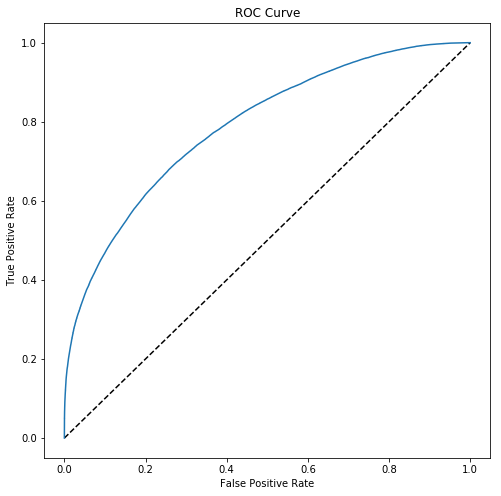


 Accuracy Score: 
 
 70.15%

 Confusion Matrix: 
 
 [[81736  3010]
 [39440 18024]]

 Classification Report: 
 
               precision    recall  f1-score   support

           0       0.67      0.96      0.79     84746
           1       0.86      0.31      0.46     57464

    accuracy                           0.70    142210
   macro avg       0.77      0.64      0.63    142210
weighted avg       0.75      0.70      0.66    142210



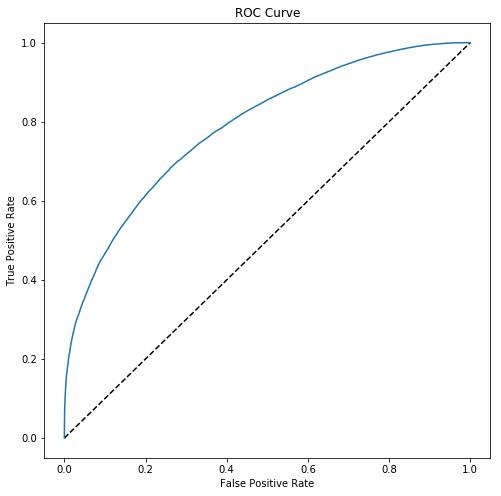

{'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.4, 'gamma': 0.3, 'colsample_bytree': 0.3}


In [22]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb = xgb.XGBRFClassifier()
parameters = {
    "learning_rate": [.1, .2, .3, .4, .5],
    "max_depth": [x for x in range(3, 11)],
    "colsample_bytree": [x/10 for x in range(1, 10)],
    "gamma": [x/10 for x in range(0, 6)],
    "min_child_weight": [x for x in range(1, 4)]
}
rand_search = RandomizedSearchCV(xgb, param_distributions=parameters, n_iter=10, n_jobs=-1, cv=5, scoring='roc_auc')
fitted = rand_search.fit(X_train, y_train)
score_model(fitted, X_train, y_train)
score_model(fitted, X_test, y_test)
print(rand_search.best_params_)

## Part 4: Final Interpretations

In [ ]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Fitting the best models found during hyperparameter tuning.
logreg = LogisticRegression(solver='lbfgs')
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, max_features=.15, n_jobs=-1)
sgd = SGDClassifier(penalty=None, loss='log', learning_rate='adaptive', eta0=3)
xgbrf = xgb.XGBRFClassifier(min_child_weight=1, max_depth=10, learning_rate=0.3, gamma=0.5, colsample_bytree=0.5)

# Create list of classifiers
classifiers = [('Logistic Regression', logreg), ('Naive Bayes', nb), ('Random Forest', rf), ('XGBoost', xgbrf),
               ('SGDClassifier', sgd)]

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers, voting='soft')

# Fit vc to the training set
vc.fit(X_train_mm, y_train_mm)

# Evaluate the test set predictions
y_pred = vc.predict(X_test_mm)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.2%}'.format(accuracy))